In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


Mounted at /content/drive


In [ ]:
# importing machine learning libraries and modules
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor
from pprint import pprint
from sklearn.metrics import mean_squared_error, precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix, classification_report, roc_auc_score
import warnings
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from time import time
import scipy.stats as stats 
import scipy.stats
from sklearn.linear_model import SGDClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/indian_liver_patient.csv')

In [ ]:
fix_data = data.copy()

In [ ]:
fix_data['Albumin_and_Globulin_Ratio'].unique()
fix_data.fillna(fix_data['Albumin_and_Globulin_Ratio'].median(), inplace=True)
# liver_k_near.isnull().sum()

In [ ]:
fix_data['Liver_Disease'] = fix_data['Dataset'].replace([1,2],[0,1])
fix_data = fix_data.drop('Dataset', axis=1)
fix_data['Liver_Disease'].value_counts()

0    416
1    167
Name: Liver_Disease, dtype: int64

In [ ]:
fix_data['Gender'] = fix_data['Gender'].astype('category').cat.codes
fix_data.head(300)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
295,22,1,0.6,0.2,202,78,41,8.0,3.9,0.90,0
296,74,0,0.9,0.3,234,16,19,7.9,4.0,1.00,0
297,25,0,0.9,0.3,159,24,25,6.9,4.4,1.70,1
298,31,0,1.1,0.3,190,26,15,7.9,3.8,0.90,0


In [ ]:
# creating print_metrics function
def print_metrics(labels, preds):
    precision = precision_score(labels, preds, zero_division=1)
    recall = recall_score(labels, preds)
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds)

    print("Precision Score: {}".format(precision))
    print("Recall Score: {}".format(recall))
    print("Accuracy Score: {}".format(accuracy))
    print("F1 Score: {}".format(f1))

    # Create a dictionary of scores
    scores_dict = {
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy,
        'F1': f1
    }

    # Convert the dictionary into a dataframe
    scores_df = pd.DataFrame.from_dict(scores_dict, orient='index', columns=['Score'])
    scores_df.reset_index(inplace=True)
    scores_df = scores_df.rename(columns={'index': 'Metric'})

    # Create the bar plot
    plt.figure(figsize=(6, 6))
    sns.barplot(x='Metric', y='Score', data=scores_df, palette='Set3')
    plt.title('Model Evaluation Metrics')
    plt.xlabel('Metric')
    plt.ylabel('Score')
    plt.xticks(rotation=90)
    plt.show()


# **1-K-Nearest Neighbors Algorithm:**

---





In [ ]:
liver_k_near = fix_data.copy()

In [ ]:
# creating train_test_split
X = liver_k_near.drop(['Liver_Disease'], axis=1)
y = liver_k_near['Liver_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)

knn_y_trials = knn_clf.predict(X_train)

knn_y_pred = knn_clf.predict(X_test) 

KNN Test Metrics:


Precision Score: 0.43478260869565216
Recall Score: 0.425531914893617
Accuracy Score: 0.6971428571428572
F1 Score: 0.43010752688172044


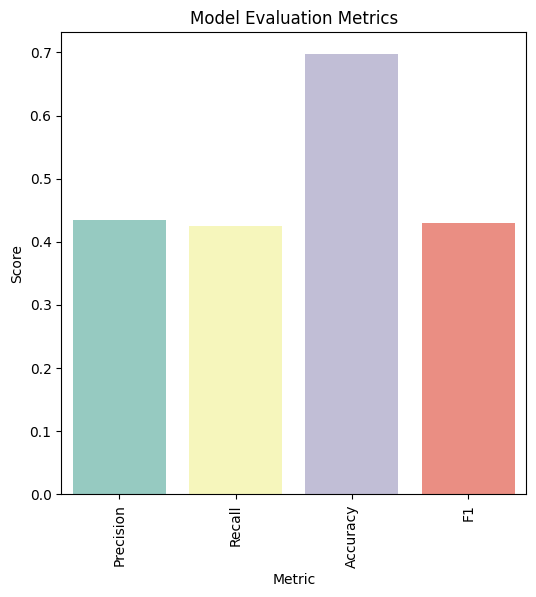

In [ ]:
print('KNN Test Metrics:')
print('\n')
print_metrics(y_test, knn_y_pred)

In [ ]:
# showing auc of KNN algorithm
print('KNN AUC:')
knn_false_positive_rate, knn_true_positive_rate, knn_thesholds = roc_curve(y_test, knn_y_pred)
knn_auc = auc(knn_false_positive_rate, knn_true_positive_rate)
knn_auc

KNN AUC:


0.6112034574468086

# ****2-Support Vector Machines (SVM) Algorithm:****:

---





In [ ]:
live_SVM = fix_data.copy()

In [ ]:
# creating train_test_split
X = live_SVM.drop(['Liver_Disease'], axis=1)
y = live_SVM['Liver_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
svm_clf = svm.SVC(random_state=42)

svm_clf.fit(X_train, y_train)

svm_y_trials = svm_clf.predict(X_train)

svm_y_pred = svm_clf.predict(X_test)

SVM Test Metrics:


Precision Score: 1.0
Recall Score: 0.0
Accuracy Score: 0.7314285714285714
F1 Score: 0.0


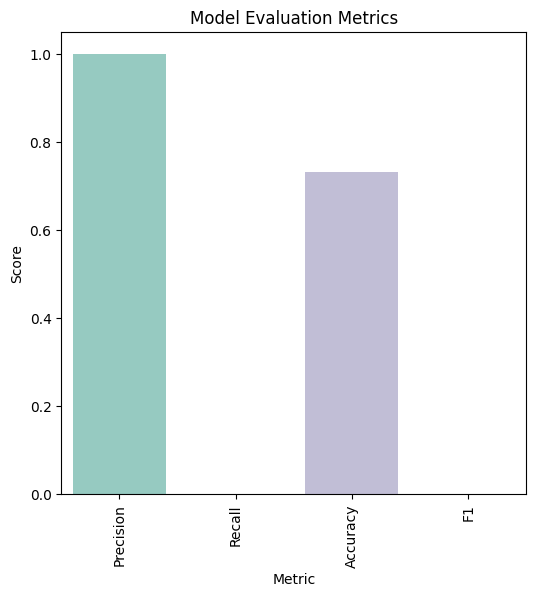

In [ ]:
print('SVM Test Metrics:')
print('\n')
print_metrics(y_test, svm_y_pred)

In [ ]:
# showing auc of SVM algorithm
print('SVM AUC:')
svm_false_positive_rate, svm_true_positive_rate, svm_thresholds = roc_curve(y_test, svm_y_pred)
svm_auc = auc(svm_false_positive_rate, svm_true_positive_rate)
svm_auc

SVM AUC:


0.5

# **3-Decision Tree Algorithm:**

---





In [ ]:
liver_Decision_Tree = fix_data.copy()

In [ ]:
X = liver_Decision_Tree.drop(['Liver_Disease'], axis=1)
y = liver_Decision_Tree['Liver_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)

dt_clf.fit(X_train, y_train)

dt_y_trails = dt_clf.predict(X_train)

dt_y_pred = dt_clf.predict(X_test)

Decision Tree Test Metrics:


Precision Score: 0.43636363636363634
Recall Score: 0.5106382978723404
Accuracy Score: 0.6914285714285714
F1 Score: 0.4705882352941176


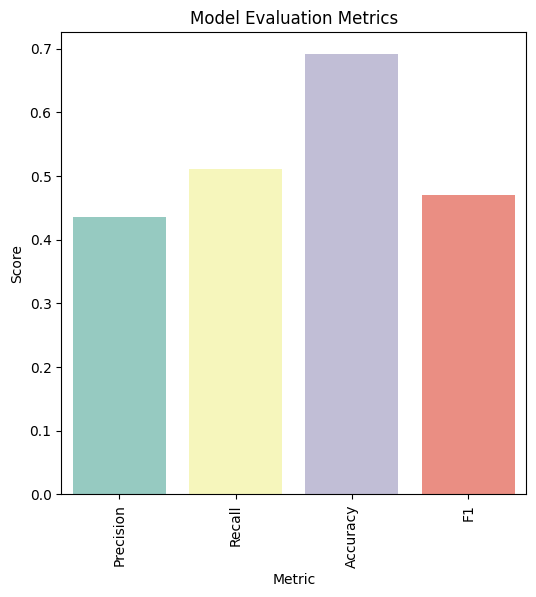

In [ ]:
# showing metrics for test sets
print('Decision Tree Test Metrics:')
print('\n')
print_metrics(y_test, dt_y_pred)

In [ ]:
# showing auc of Decision Tree algorithm
print('Decision Tree AUC:')
dt_false_positive_rate, dt_true_positive_rate, dt_thesholds = roc_curve(y_test, dt_y_pred)
dt_auc = auc(dt_false_positive_rate, dt_true_positive_rate)
dt_auc

Decision Tree AUC:


0.6342253989361701

# **4-eXtreme Gradient Boosting Algorithm (XGBoost):**

---





In [ ]:
liver_XGBoost = fix_data.copy()

In [ ]:
# creating train_test_split
X = liver_XGBoost.drop(['Liver_Disease'], axis=1)
y = liver_XGBoost['Liver_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
xgb_clf = xgb.XGBClassifier(random_state=42)

xgb_clf.fit(X_train, y_train)

xgb_y_trials = xgb_clf.predict(X_train)

xgb_y_pred = xgb_clf.predict(X_test)

XGBoost Test Metrics:
Precision Score: 0.46808510638297873
Recall Score: 0.46808510638297873
Accuracy Score: 0.7142857142857143
F1 Score: 0.46808510638297873


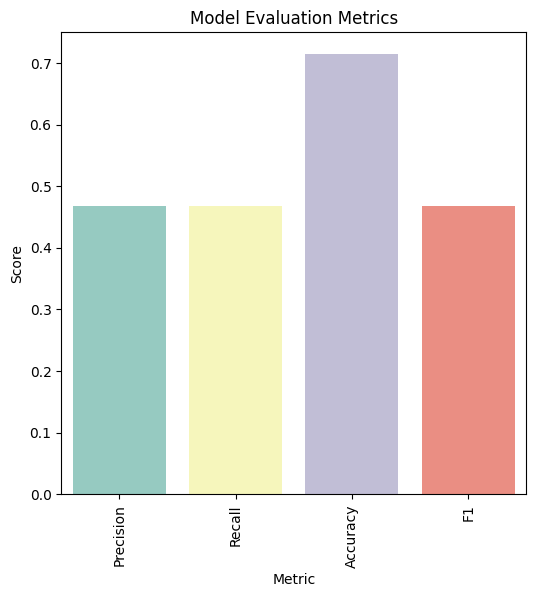

In [ ]:
print('XGBoost Test Metrics:')
print_metrics(y_test, xgb_y_pred)

In [ ]:
# showing auc of eXtreme Gradint Boosting algorithm
print('XGBoost AUC:')
xgb_false_positive_rate, xgb_true_positive_rate, xgb_thesholds = roc_curve(y_test, xgb_y_pred)
xgb_auc = auc(xgb_false_positive_rate, xgb_true_positive_rate)
xgb_auc

XGBoost AUC:


0.6363863031914894

# **5-Random Forest Algorithm:**

---





In [ ]:
liver_forest = fix_data.copy()

In [ ]:
# creating train_test_split
X = liver_forest.drop(['Liver_Disease'], axis=1)
y = liver_forest['Liver_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# instantiating, fitting, and predicting using Random Forest algorithm model
rf_clf = RandomForestClassifier(random_state=42)

rf_clf.fit(X_train, y_train)

rf_y_trials = rf_clf.predict(X_train)

rf_y_pred = rf_clf.predict(X_test)

Random Forest Test Metrics:


Precision Score: 0.48484848484848486
Recall Score: 0.3404255319148936
Accuracy Score: 0.7257142857142858
F1 Score: 0.39999999999999997


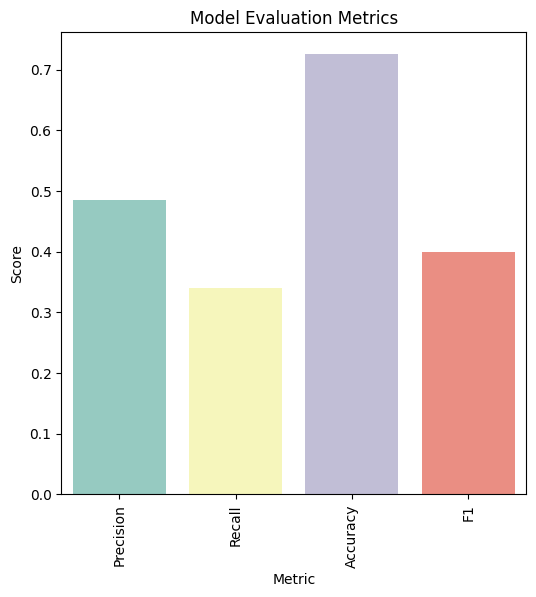

In [ ]:

# showing metrics for test set
print('Random Forest Test Metrics:')
print('\n')
print_metrics(y_test, rf_y_pred)

In [ ]:
# showing auc of Random Forest algorithm
print('Random Forest AUC:')
rf_false_positive_rate, rf_true_positive_rate, rf_thesholds = roc_curve(y_test, rf_y_pred)
rf_auc = auc(rf_false_positive_rate, rf_true_positive_rate)
rf_auc

Random Forest AUC:


0.6038065159574468

# **ROC/AUC Curve Visualization Of All Algorithms::**

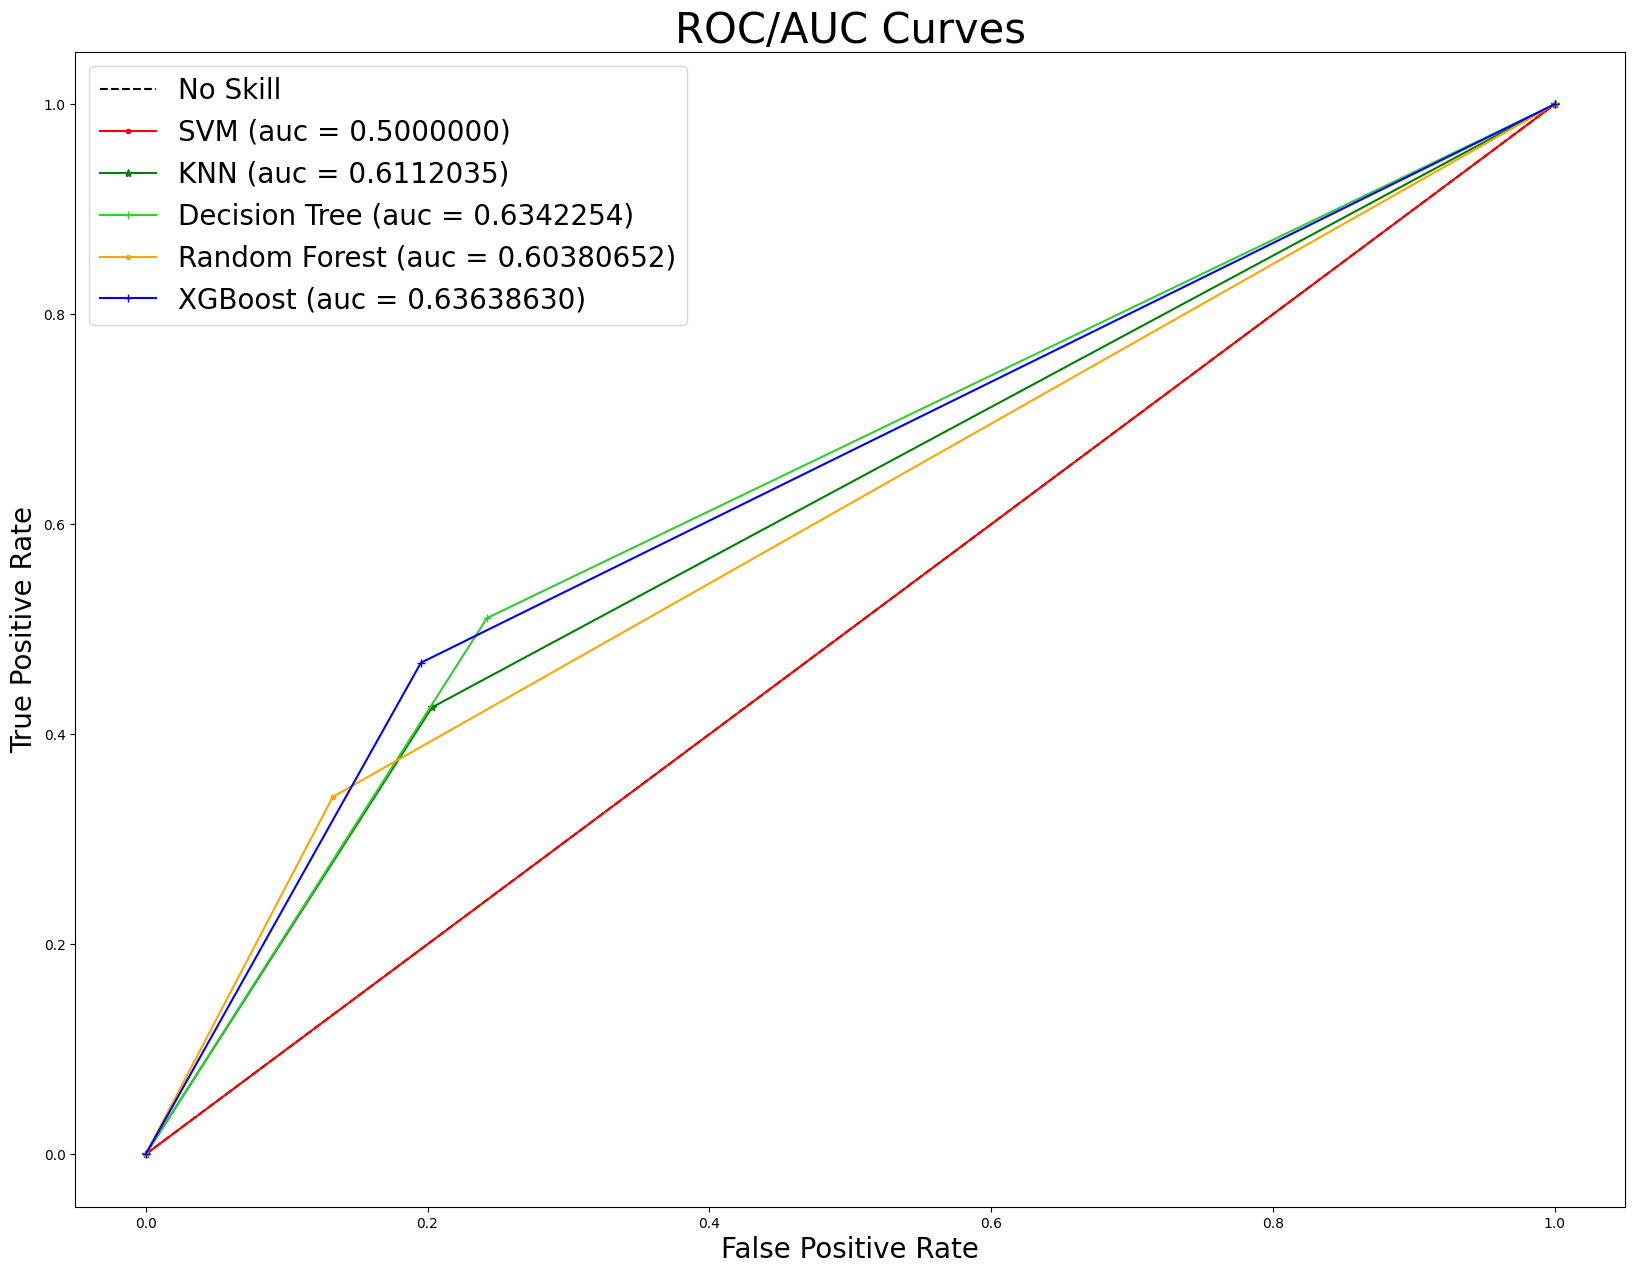

In [ ]:
# creating no skill line
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

plt.figure(figsize=(20,15))
plt.title('ROC/AUC Curves',fontsize=30)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, color='black', linestyle='--', label='No Skill')
plt.plot(svm_false_positive_rate, svm_true_positive_rate, color='red', linestyle='-', marker='.', label='SVM (auc = %0.7f)' % svm_auc)
plt.plot(knn_false_positive_rate, knn_true_positive_rate, color='green', linestyle='-', marker='*', label='KNN (auc = %0.7f)' % knn_auc)
plt.plot(dt_false_positive_rate, dt_true_positive_rate, color='limegreen', linestyle='-', marker='+', label='Decision Tree (auc = %0.7f)' % dt_auc)
plt.plot(rf_false_positive_rate, rf_true_positive_rate, color='orange', linestyle='-', marker='.', label='Random Forest (auc = %0.8f)' % rf_auc)
plt.plot(xgb_false_positive_rate, xgb_true_positive_rate, color='blue', linestyle='-', marker='+', label='XGBoost (auc = %0.8f)' % xgb_auc)


# axis labels
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

# show the legend
plt.legend(prop={'size': 20})


# show the plot
plt.show()